# Market Basket Analysis

Market Basket Analysis is a data mining technique used to uncover relationships between items purchased together in a transaction. It helps retailers understand customer purchasing behavior by identifying patterns, such as which products are frequently bought together.

## Key Concepts

### 1. Association Rules
These are rules that describe the relationships between items. For example, if customers often buy bread and butter together, the rule might be:
- **If bread is bought, butter is likely to be bought.**

### 2. Support
This measures how often items appear together in transactions. It’s calculated as the proportion of transactions that include both items.

### 3. Confidence
This indicates the likelihood that a customer who buys one item will also buy another. It’s calculated as the support of the item set divided by the support of the first item.

### 4. Lift
This measures the strength of the association between items, comparing the observed support of the items together to the support expected if they were independent. A lift greater than 1 indicates a positive correlation.

## Applications
Retailers use Market Basket Analysis to:
- Optimize product placement
- Create promotions
- Improve inventory management

Ultimately, this enhances sales and customer satisfaction.

<img src="https://i.ytimg.com/vi/zkpskbTGw6I/maxresdefault.jpg">

In [2]:
# MARKET ANALYSIS FOR A SUPERMARKET STORE
# OBJECTIVE: WHICH ITEMS ARE ASSOCIATED TOGETHER TO BOST SALES(LIFT)

# Import the Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the Retail Data
retail_data = pd.read_csv('https://msi.martial.co.ke/data/OnlineRetail.csv')
retail_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
# Data Analysis
# a) Check any empty records, increase there is?, we can drop them
# The Customers who are empty, are the ones who pay via cash
# Lets drop the empty records.
retail_data.isnull().sum()

retail_data.dropna(inplace=True)

retail_data.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [5]:
# Lets Check How Many Countries these Business Operates
# You can relate this one to Branches that the Retail Business has.

# Customer purchasing behaviour depends on the regions
# E,g Clothes Bought in Saudi Arabia might be different from clothes bought in Netherlands.

retail_data.groupby('Country').size().sort_values(ascending=False)

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


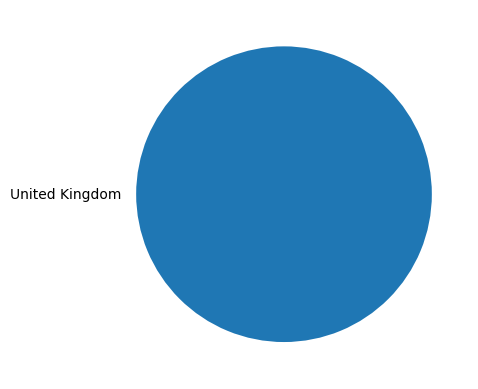

In [7]:
# Pick transactions for specific region - United kingdom(Most active region)

data = retail_data[retail_data['Country'] == "United Kingdom"]
data.groupby('Country').size().plot(kind='pie')
data

In [15]:
# Create the basket
# Pick columns - InvoiceNo, Description, Quantity

basket = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0).reset_index().set_index('InvoiceNo')
basket

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-11.0,0.0,0.0,0.0,0.0
C581499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# One-Hot Encoding
# Feature where we replace any value more than 0 with 1

def encode_quantities(x):
    if x <= 0:
        return 0
    if x > 0:
        return 1
    

# apply function to the basket
basket_sets = basket.applymap(encode_quantities)
basket_sets


/tmp/ipykernel_27537/1545782798.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_quantities)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Apply apriori algorithms
# import association rules and apriori from mlextend library

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [25]:
# Determine the frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets

/home/harris/Documents/Martial Jenga Labs/code/unsupervised-learning-lab/.venv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.031626,(6 RIBBONS RUSTIC CHARM)
1,0.021604,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.029561,(60 TEATIME FAIRY CAKE CASES)
3,0.022360,(72 SWEETHEART FAIRY CAKE CASES)
4,0.034748,(ALARM CLOCK BAKELIKE GREEN)
...,...,...
159,0.020648,"(LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D..."
160,0.020648,"(LUNCH BAG SUKI DESIGN , LUNCH BAG RED RETROSPOT)"
161,0.022007,"(PAPER CHAIN KIT 50'S CHRISTMAS , PAPER CHAIN ..."
162,0.021554,"(RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI..."


In [26]:
# Apply association rule
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.038173,0.034748,0.022863,0.598945,17.236584,1.0,0.021537,2.406779,0.979369,0.456740,0.584507,0.628458
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.034748,0.038173,0.022863,0.657971,17.236584,1.0,0.021537,2.812121,0.975895,0.456740,0.644397,0.628458
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.031576,0.037367,0.023065,0.730463,19.548240,1.0,0.021885,3.571425,0.979782,0.502744,0.720000,0.673857
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.037367,0.031576,0.023065,0.617251,19.548240,1.0,0.021885,2.530179,0.985676,0.502744,0.604771,0.673857
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.030820,0.024828,0.020345,0.660131,26.588673,1.0,0.019580,2.869257,0.992994,0.576320,0.651478,0.739802
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.024828,0.030820,0.020345,0.819473,26.588673,1.0,0.019580,5.368602,0.986892,0.576320,0.813732,0.739802
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.034144,0.030820,0.023971,0.702065,22.779253,1.0,0.022919,3.252989,0.989900,0.584767,0.692590,0.739921
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030820,0.034144,0.023971,0.777778,22.779253,1.0,0.022919,4.346351,0.986505,0.584767,0.769922,0.739921
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.046734,0.039835,0.020043,0.428879,10.766443,1.0,0.018182,1.681195,0.951591,0.301287,0.405185,0.466020
9,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.039835,0.046734,0.020043,0.503161,10.766443,1.0,0.018182,1.918660,0.944753,0.301287,0.478803,0.466020
